<a href="https://colab.research.google.com/github/AashiDutt/Pytorch/blob/master/Transfer_Learning_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### what is transfer learning?

**Transfer** **learning** in simple terms is when you take knowledge obtained from the completion of one task and implement it towards a second desired task that needs to be achieved.


### when to use Transfer Leaarning?

1. Not enough labelled data
2. effective pre trained model already exists

### working of transfer learning

**Pre-Trained models used in this repository :**

AlexNet and VGG16

**AlexNet :**

- It consists of a feature section that consists of 5 convolution of layers while the classifier section consists of 3 fully connected layers.

- The model takes an input of 224 x224 which is the
size of the images that it was trained on.

**VGG16 :**

- The model consists of the same inputs space which is to 24 by 224 as both these pytorch models have been trained on the same network.

- This model is larger than the Alex NEP model containing a total of 13 convolution of layers and an additional 3 fully connected layers adding up to the 16 layers that the model name would imply.

**How to use pre trained models:**

we're going to use our pre trained model is as follows convolution of neural networks are known
to have only two portions the first being the features portion which consists mainly of the convolutional layers and pooling layers and is trained to extract images from features.

The second being the classifier portion which consists of the fully connected output layers that decide which features are important to use for classification.

- we're going to **freeze the parameters inside the feature extraction portion** of our network.

- This means the convolution of layers will be unaffected by the training and we do this using our own data sets that we created ourselves.

- We're going to use the feature extraction knowledge they have developed without tampering with it.

- We will keep the fully connected layers dynamic as we want them to learn which features are important.

- so the parameters in the fully connected layer will change and adapt to our small dataset.


[our last fully connected layer for both models consists of 1000 nodes as we only need to classify between two data classes.

We will add another layer containing two nodes at the end of the model before training the results of

this will speak for themselves.]

In [1]:
# CODE

# Loading Images and Transforms

!pip3 install torch torchvision

  Using cached https://files.pythonhosted.org/packages/14/41/db6dec65ddbc176a59b89485e8cc136a433ed9c6397b6bfe2cd38412051e/Pillow-6.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
from torchvision import datasets, transforms, models
# models allow us to import pre trained model into our code

# transformations are used to preprocess the dataset before it is fed to neural network
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# making use of Colab GPU using Cuda
# Runtime -->Change runtime type--> Hardware --> GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [5]:
!ls

ants_and_bees  data  sample_data


In [6]:
!ls ants_and_bees

train  val


In [7]:
!ls ants_and_bees/train    # checking training_data

ants  bees


In [8]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [0]:
# ants and bees images are 224x224
#applying data augmentation transform to training dataset(only)
transform_train = transforms.Compose([transforms.Resize((224,224)),transforms.RandomHorizontalFlip(),transforms.RandomAffine(0,shear=10 ,scale=(0.8,1.2)),transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
#Compose allows us to chain together transformations

#we chose value 0.5 because we want values in range 0 to 1,creating a range (-1 to 1)

# Normalizing the image 
# formula z = (x - mean)/ standard deviation
# eg. (min value - mean)/standard deviation = (0-0.5)/0.5 = -1
# (max value- mean)/sd = (1-0.5)/0.5 =1  therefore range = (-1,1)

#Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) = Normalize(mean,standard deviation)
#Normalize the value of each tensor of image size channel height and widthin 1st set of brackets
#converts numpy array(of range 0-255) to tensor (a float tensor in range 0 to 1)

# defining root directory of training_dataset
training_dataset = datasets.ImageFolder('ants_and_bees/train',transform =transform_train )
validation_dataset = datasets.ImageFolder('ants_and_bees/val',transform =transform )


training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 20, shuffle = True)
validation_loader =torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 20, shuffle = False)

In [10]:
print(len(training_dataset))
print(len(validation_dataset))

244
153


In [0]:
# to plot an image convert it again to a numpy array
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  # clone to create new copy of tensor
  # use detach function to call numpy
  
  image = image.transpose(1,2,0)
  # we have shape of tensor as(1,28,28)(single colorchannel,shape(28,28)) but to plot a grayscale image we need tensor of shape (28,28,1)
  # we swap axis using transpose means swap axis 0 for axis 1, axis 1 fo axis 2 and axis 0 in the end
  #print(image.shape)
  # denormalizing the image
  # x=z * standard deviation + mean
  
  image = image *np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  # to reconvert range from (-1,1) to (1,1) we use clip function
  return image


In [12]:
!pip install Pillow==4.0.0

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.3.0 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 6.1.0
    Uninstalling Pillow-6.1.0:
      Successfully uninstalled Pillow-6.1.0


In [0]:
classes =('ant','bee')
# ants belong to class 0 and bees to class 1

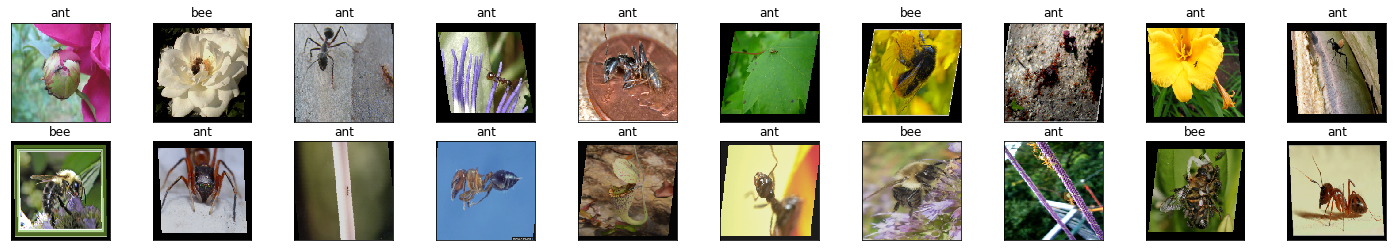

In [14]:
# creating a iterator 
# iter creates an object that allows us to go through the iterable of training loader one element at a time 
dataiter = iter(training_loader)
images , labels = dataiter.next()
#images, labels = dataiter.next() # gets first batch of training data
fig = plt.figure(figsize =(25,4))

for idx in np.arange(20):
  ax =fig.add_subplot(2,10,idx+1,xticks =[],yticks =[])   # 2 rows 10 columns per row and index
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [0]:
model =models.vgg16(pretrained =True)  # loading a pre trained model

In [16]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
# freeze the parameters inside feature extraction part of network such that convolutional layers are unaffected by the training
# keeping fully connected layers dynamic as we need them to learn which fetures are importantto classify for our dataset

# freezing parameters
for param in model.features.parameters():
  param.requires_grad = False

In [18]:
# to change the no. of output node from 1000 to 2 (no. of classes to distinguish)

import torch.nn as nn

n_inputs = model.classifier[6].in_features # asses 6th row of classifier to get input features
last_layer = nn.Linear(n_inputs,len(classes)) # change last layer output to length of classes i.e 2
model.classifier[6] = last_layer
model.to(device)
print(model.classifier[6].out_features)

2


In [0]:
# Loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [20]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
 
for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
 
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 41.0892, acc 0.5369 
validation loss: 0.4713, validation acc 0.9020 
epoch : 2
training loss: 2.8399, acc 0.7705 
validation loss: 4.9432, validation acc 0.8105 
epoch : 3
training loss: 0.9884, acc 0.8852 
validation loss: 2.0352, validation acc 0.8824 
epoch : 4
training loss: 1.3552, acc 0.8975 
validation loss: 6.1954, validation acc 0.8627 
epoch : 5
training loss: 2.0239, acc 0.9016 
validation loss: 3.5454, validation acc 0.8758 


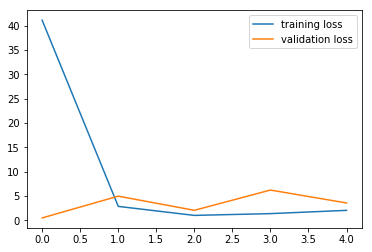

In [21]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label= 'validation loss')
plt.legend()

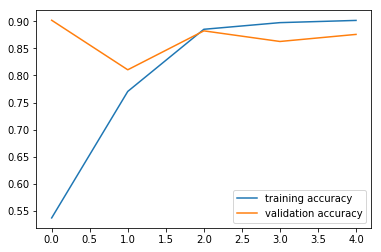

In [22]:
plt.plot(running_corrects_history ,label ='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [23]:
!pip3 install pillow==4.0.0

In [0]:
import PIL.ImageOps

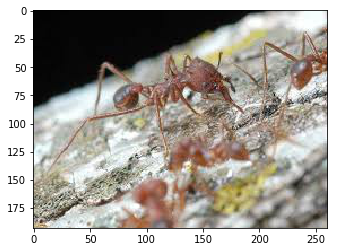

In [25]:
import requests
from PIL import Image
 
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5JMnIhIzJdJ5Hs0hhrnjRQ-c0rfEElHw4sHAQSNGtFwQz5N51Ag'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

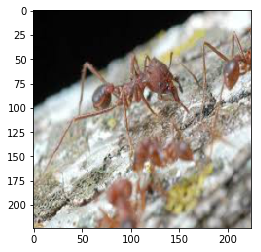

In [26]:
img = transform(img)
plt.imshow(im_convert(img))

In [27]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])


ant


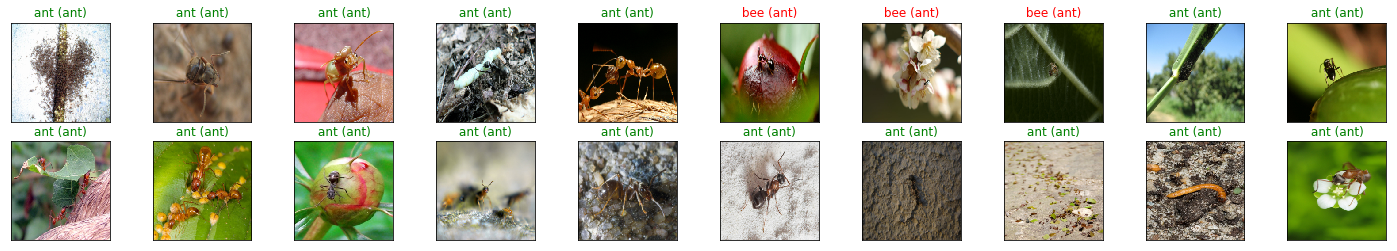

In [28]:
# creating a iterator 
# iter creates an object that allows us to go through the iterable of training loader one element at a time 
dataiter = iter(validation_loader)
images , labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)



output = model(images)
_,preds = torch.max(output, 1)


fig = plt.figure(figsize =(25,4))

for idx in np.arange(20):
  ax =fig.add_subplot(2,10,idx+1,xticks =[],yticks =[])   # 2 rows 10 columns per row and index
  plt.imshow(im_convert(images[idx]))
  ax.set_title(" {} ({}) ".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])), color= "green" if preds[idx]==labels[idx] else "red")